<a href="https://colab.research.google.com/github/ulya1202/NLP/blob/main/Summeration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import pipeline, set_seed

In [ ]:
!pip install datasets --upgrade #en axirnci versiyasin qaytarsin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [ ]:
from datasets import load_dataset

dataset=load_dataset('cnn_dailymail','3.0.0') #xebrler
dataset

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [ ]:
dataset['train'].features

{'article': Value(dtype='string', id=None),
 'highlights': Value(dtype='string', id=None),
 'id': Value(dtype='string', id=None)}

In [ ]:
dataset['train'].column_names #sutun adlarini qaytarir

['article', 'highlights', 'id']

In [ ]:
sample=dataset['train'][0]
print(f"""
Article (except of 500 characters, total length:{ len(sample['article']) } characters):
""")
print(sample['article'][:500])
print(f"\nSummary (length:{len(sample['highlights'])} characters):")
print(sample['highlights'])


Article (except of 500 characters, total length:2527 characters):

LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as s

Summary (length:217 characters):
Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .
Young actor says he has no plans to fritter his cash away .
Radcliffe's earnings from first five Potter films have been held in trust fund .


#Text Summarizatioin Pipeline

In [ ]:
sample_text=dataset['train'][0]['article'][:2000] #ilk 2000 herifi
#bezileri uzundu isteyrik  uzundursa sileeeyik
summarize={}

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize #

nltk.download('punkt_tab')#setirleri bolecek hazi rmodeldi #ferqli cumleer  noqte gore novbeti setir ,  amma U.s de problem olur,

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
string='The U.S. are a country. Then U.N.  is an organization ' #noqteye gor yox cumleye gore
sent_tokenize(string)

['The U.S. are a country.', 'Then U.N.  is an organization']

In [ ]:
#baseline duzltmek lazimdi
#baselin e timeseriesede son gun
#bezi modeelrd exetti model
#ilk 3 cumle  burda


def three_sentence_summary(text):
    return '\n'.join(sent_tokenize(text)[:3])

In [ ]:
summarize['baseline']=three_sentence_summary(sample_text)

#GPT-2

In [ ]:
from transformers import pipeline, set_seed

set_seed(42)
pipe=pipeline('text-generation', model='gpt2')#-xl lsa idi dah ayaxsi oalrdi , bu en balacasidi , bu model cumlenien arxsin igetiri, sual caavb vere n edeyil, eger osnra simmarize: yazsaq onun summarizidin getireck

gpt2_query=sample_text+'\nTL;DR:\n' #too long didnt read , cox yazand abunu elave dir \summary yazsaq summaryde olur,

pipe_out=pipe(gpt2_query, max_length=512, clean_up_tokenization_spaces=True)

summarize['gpt2']='\n'.join(sent_tokenize(pipe_out[0]['generated_text'][len(gpt2_query):])) #menim

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


#T5

In [ ]:
pipe=pipeline('summarization', model='t5-small')
pipe_out=pipe(sample_text)
summarize['t5']='\n'.join(sent_tokenize(pipe_out[0]['summary_text']))

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
#unnsupervised , mueyyen qederde supervised summeriaation classification uchun

#BART

In [ ]:
pipe=pipeline('summarization', model='facebook/bart-large-cnn')
pipe_out=pipe(sample_text)
summarize['bart']='\n'.join(sent_tokenize(pipe_out[0]['summary_text']))

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
#bart enc-decoder, bu dataset uzerinde fine_tunig olunub

#PEGASUS

In [ ]:
pipe=pipeline('summarization', model='google/pegasus-cnn_dailymail')
pipe_out=pipe(sample_text)
summarize['pegasus']=pipe_out[0]['summary_text'].replace(' .', '.\n')

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


In [ ]:
#xususuile nezerde tutlub summarizaton , pre trainig

#Comparing Different Summaries

In [ ]:
print('GROUND TRUTH')
print(dataset['train'][0]['highlights'])
print("")


for model_name in summarize:
    print(model_name.upper())
    print(summarize[model_name])
    print("")
#cavabla rekstraktiv uzerinden oyrenilib

#Measuring the Quality of Generated Text

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 6.8 MB/s eta 0:00:00


In [ ]:
from evaluate import load #xuusile tercumede ! axi bir cumle 2-3 cur tercme olunur
bleu_metric=load('sacrebleu') #n-grmalara gore , penalytisede var

In [ ]:
import pandas as pd
import numpy as np

bleu_metric.add(
    prediction='the the the the the ', reference=['the cat is on the mat']
)

results=bleu_metric.compute(smooth_method='floor', smooth_value=0) #smoothe yerine 1 qaytarsin 1 qoy onu yerine
#four gram 4 soe kimi baxir
#bi gram +unigram +  geomatrec mena  root/unigram *bigram*3gram*4gram kok atda 4 dereceden , word net !!! ARAShdir nec eolur  , nece olur sozler
results['precisions']=[np.round(p,2) for p in results['precisions']]
pd.DataFrame.from_dict(results, orient='index')

,0
score,0.0
counts,"[2, 0, 0, 0]"
totals,"[5, 4, 3, 2]"
precisions,"[40.0, 0.0, 0.0, 0.0]"
bp,0.818731
sys_len,5
ref_len,6


In [ ]:

bleu_metric.add(
    prediction='the cat sat on the mat ', reference=['the cat is on the mat']
)

results=bleu_metric.compute(smooth_method='floor', smooth_value=0) #smoothe yerine 1 qaytarsin 1 qoy onu yerine
#four gram 4 soe kimi baxir
#bi gram +unigram +  geomatrec mena  root/unigram *bigram*3gram*4gram kok atda 4 dereceden , word net !!! ARAShdir nec eolur  , nece olur sozler
results['precisions']=[np.round(p,2) for p in results['precisions']]
pd.DataFrame.from_dict(results, orient='index')

,0
score,0.0
counts,"[5, 3, 1, 0]"
totals,"[6, 5, 4, 3]"
precisions,"[83.33, 60.0, 25.0, 0.0]"
bp,1.0
sys_len,6
ref_len,6


In [ ]:

bleu_metric.add(
    prediction='the cat is on mat ', reference=['the cat is on the mat']
)

results=bleu_metric.compute(smooth_method='floor', smooth_value=0) #smoothe yerine 1 qaytarsin 1 qoy onu yerine
#four gram 4 soe kimi baxir
#bi gram +unigram +  geomatrec mena  root/unigram *bigram*3gram*4gram kok atda 4 dereceden , word net !!! ARAShdir nec eolur  , nece olur sozler
results['precisions']=[np.round(p,2) for p in results['precisions']]
pd.DataFrame.from_dict(results, orient='index')

,0
score,57.893007
counts,"[5, 3, 2, 1]"
totals,"[5, 4, 3, 2]"
precisions,"[100.0, 75.0, 66.67, 50.0]"
bp,0.818731
sys_len,5
ref_len,6


In [ ]:
results

{'score': 57.89300674674101,
 'counts': [5, 3, 2, 1],
 'totals': [5, 4, 3, 2],
 'precisions': [np.float64(100.0),
  np.float64(75.0),
  np.float64(66.67),
  np.float64(50.0)],
 'bp': 0.8187307530779819,
 'sys_len': 5,
 'ref_len': 6}

In [ ]:
#pis deyil esasen tercumede istifade edir, summaryde yox, niye -->recall !!! ne qeder sozu ehate edir WOWO


#ROUGE

In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=03cb709c09059bdfd8fc7d33f126053cc3510d3d4ea32bf312a5d9cbc893c4bf
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [ ]:
rouge_metric=load('rouge')

In [ ]:
reference=dataset['train'][0]['highlights']
records=[]
#referansda olanalr biizmkinde ne qeder baxir
#1-unigram , 2-bigrm, L-longest sunstig, sum- her cumleey ayri aynashir
rouge_names=['rouge1', 'rouge2', 'rougeL', 'rougeLsum']
for model_name in summarize:
    rouge_metric.add(prediction=summarize[model_name], reference=reference)
    score=rouge_metric.compute()
    rouge_dict=dict((rn, score[rn]) for rn in rouge_names)
    records.append(rouge_dict)
pd.DataFrame.from_records(records, index=summarize.keys())

,rouge1,rouge2,rougeL,rougeLsum
baseline,0.335484,0.248366,0.296774,0.335484


In [ ]:
#sirf bun abaxma qduzgun deyil , cunki bu 1 cumleye baxir
#mukemmel metrics yoxdu

#Evaluating Pegasus

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
from evaluate import load
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

dataset=load_dataset('cnn_dailymail', '3.0.0')
rouge_metric=load('rouge', cache_dir=None)
rouge_names=['rouge1','rouge2', 'rougeL','rougeLsum']

In [ ]:
def evaluate_summaries_baseline(dataset, metric, column_text='article', column_summary='highlights'):
    summaries=[three_sentence_summary(text) for text in dataset[column_text]]#3 cumleeli baselineimi duzueldek  bu baselinelrin scorelari hesabla
    metric.add_batch(predictions=summaries, references=dataset[column_summary])
    score=metric.compute()
    return score

In [ ]:
#butun data yuzerinde bayaqki lap yuxardaki bir setri uchun idi

test_sampled=dataset['test'].shuffle(seed=42).select(range(100))#ilk 100 setru goturutk yerledhir rama  #az datan bashla experiment apar 1 batch uzerinden train !ANdrey
score=evaluate_summaries_baseline(test_sampled, rouge_metric)
rouge_dict=dict((rn, score[rn]) for rn in rouge_names)
pd.DataFrame.from_dict(rouge_dict, orient='index', columns=['baselinne'])

,baselinne
rouge1,0.386558
rouge2,0.165748
rougeL,0.246006
rougeLsum,0.352141


In [ ]:
from tqdm import tqdm
import torch

device='cuda' if torch.cuda.is_available() else 'cpu'

def chunks(list_of_elements, batch_size): #butun loader fln bele ishleyri
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i:i+batch_size]

def evaluate_summaries_pegasus(dataset, metric, model, tokenizer, batch_size=8, device=device, column_text='article', column_summary='highlights'):

    article_batches=list(chunks(dataset[column_text], batch_size)) #chunk chuk gotur texti
    target_batches=list(chunks(dataset[column_summary], batch_size)) #chuk chk gotur targettleri
    #progress bar uchun tqdm

    for article_batch, target_batch in tqdm(zip(article_batches, target_batches), total=len(article_batches)):
                ######## articel tokeniz edirk
        inputs=tokenizer.__call__(article_batch, max_length=1024, truncation=True,
                                  return_tensors='pt', padding='max_length').to(device)     #__cal siz da olar ele bel eqoyulub  ###articli texti tokenizee te
                ######  output#####
        summaries=model.generate(input_ids=inputs['input_ids'], #textimizi gonderirk to device ev input_ids lerin ireqmelri
                                 attention_mask=inputs['attention_mask'].to(device),
                                 length_penalty=0.8, num_beams=4, max_length=128)

        decode_summaries=[tokenizer.decode(s, skip_special_tokens=True,
                                           clean_up_tokenization_spaces=True) for s in summaries]

        metric.add_batch(predictions=decode_summaries, references=target_batch)
        score=metric.compute()
    return score

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model_ckpt='google/pegasus-cnn_dailymail'
tokenizer=AutoTokenizer.from_pretrained(model_ckpt) #ehtiyach yoxdu to device etmek
model=AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)

score=evaluate_summaries_pegasus(test_sampled, rouge_metric, model, tokenizer)
rouge_dict=dict((rn, score[rn]) for rn in rouge_names)
pd.DataFrame.from_dict(rouge_dict, orient='index', columns=['pegasus'])

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 13/13 [02:29<00:00, 11.48s/it]


,pegasus
rouge1,0.427414
rouge2,0.142366
rougeL,0.283524
rougeLsum,0.350480


#Training a Summarization Model

In [ ]:
# bashqa dataset uzerinde

dataset_samsum=load_dataset('knkarthick/samsum')
split_lengths=[len(dataset_samsum[split]) for split in dataset_samsum]

print(f'Split lengths"{split_lengths}')
print(f'Features:{dataset_samsum["train"].column_names}')
print('\nDialogue:')
print('\nSummary:')
print(dataset_samsum['test'][0]['summary'])

README.md:   0%|          | 0.00/4.36k [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/9.26M [00:00<?, ?B/s]

validation.csv:   0%|          | 0.00/504k [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/522k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Split lengths"[14732, 818, 819]
Features:['id', 'dialogue', 'summary']

Dialogue:

Summary:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact Larry.


#Evaluating Pegasus on Samsum

In [ ]:
pipe_out=pipe(dataset_samsum['test'][0]['dialogue'])
print('Summary')
print(pipe_out[0]['summary_text'].replace(' .','\n'))

Your max_length is set to 128, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)


Summary
Amanda: Ask Larry Amanda: He called her last time we were at the park together
<n>Hannah: I'd rather you texted him
<n>Amanda: Just text him



In [ ]:
#extractive  ishleyri gorunduyu kimiburda abstraktiv olmalidi !! ona gore abstraktiv etmek lazimdi bunu

In [ ]:
# score=evaluate_summaries_pegasus(dataset_samsum['test'], rouge_metric, model, tokenizer, column_text='dialogue', column_summary='summary', batch_size=4)

# rouge_dict=dict((rn,score[rn]) for rn in rouge_names)
# pd.DataFrame.from_dict(rouge_dict, orient='index', columns=['pegasus'])
#pegaususun scorlarin bu yuxardaki gosterri

In [ ]:
#model pisnetice qaytarir

#Fine-Tuning PEGASUS

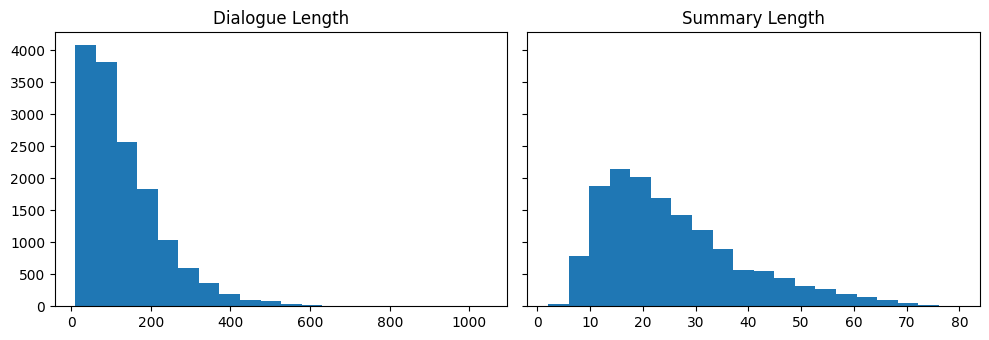

In [ ]:

d_len=[len(tokenizer(s).input_ids) for s in dataset_samsum['train']['dialogue'] if s ]
s_len=[len(tokenizer(s).input_ids) for s in dataset_samsum['train']['summary'] if s]

fig, axes=plt.subplots(1,2, figsize=(10,3.5), sharey=True)
axes[0].hist(d_len, bins=20)
axes[0].set_title('Dialogue Length')
axes[1].hist(s_len, bins=20)
axes[1].set_title('Summary Length')
plt.tight_layout()
plt.show()



In [ ]:
def convert_examples_to_features(example_batch):
    # --- DATA CLEANING STEP ---
    # Ensure all dialogues and summaries are strings. Replace None with ''.
    dialogues = [s if s is not None else "" for s in example_batch['dialogue']]
    summaries = [s if s is not None else "" for s in example_batch['summary']]
    # --- END OF CLEANING STEP ---

    # Now, pass the cleaned lists to the tokenizer
    input_encodings = tokenizer(dialogues, max_length=1024,
                                truncation=True, padding='max_length')
    # with tokenizer.as_target_tokenizer(): #encoder uchun ayri decoder uchun ayri torkinezer  SPECILA token ferqi
    #     target_encodings = tokenizer(text_target=summaries, max_length=128,
    #                                 truncation=True, padding='max_length')
    target_encodings = tokenizer(text_target=summaries, max_length=128,
                                    truncation=True, padding='max_length')

    return {"input_ids": input_encodings['input_ids'],
            'attention_mask': input_encodings['attention_mask'],
            'labels': target_encodings['input_ids']}

# This part remains the same and will now work correctly
dataset_samsum_pt = dataset_samsum.map(convert_examples_to_features, batched=True)
columns = ['input_ids', 'labels', 'attention_mask']
dataset_samsum_pt.set_format(type='torch', columns=columns)

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

#PAD

In [ ]:
#NER uchunde bunu uchuned PAD etmek lazimdi

In [ ]:
from transformers import DataCollatorForSeq2Seq #pzad edir

seq2seq_data_collator=DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
from transformers import TrainingArguments, Trainer
training_args=TrainingArguments(
    output_dir='pegasus-samsum', num_train_epochs=1, warmup_steps=500,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    weight_decay=0.01,
    logging_steps=10,
    eval_strategy='steps',
    eval_steps=500,
    save_steps=1e6,
    gradient_accumulatin_steps=16 #gradienti yadda saxla , 16 defe yig gradienti osonra bckward et
)
trainer=Trainer(model=model,
                args=training_args,
                processing_class=tokenizer,
                data_collator=seq2seq_data_collator,
                train_dataset=dataset_samsum_pt['train'],
                eval_dataset=dataset_samsum_pt['validation'])


In [ ]:
trainer.train()
#cudada qalmayibsa quntization, batch azalt , distill  samlll, batch olcusunu balaca
score=evaluate_summaries_pegasus(
    dataset_samsum['test'], rouge_metric,trainer.model, tokenizer, batch_size=2, column_text='dialogue', column_summary='summary')
score